# Estadística Descriptiva  
## Medidas de Tendencia, Dispersión y Normalización (Aplicado a Machine Learning)

En este notebook se realiza un análisis descriptivo completo utilizando un dataset con **sesgo a la derecha**, incluyendo:

- Medidas de tendencia central  
- Medidas de dispersión  
- Histogramas y boxplots  
- Normalización (Min-Max y Z-score), necesaria para Machine Learning  
- Explicaciones y conclusiones  

Este trabajo se hace siguiendo los temas vistos en clase.


## 📘 Introducción

La estadística descriptiva permite comprender cómo se comportan los datos.  
En este caso trabajamos con un dataset creado especialmente para mostrar un **sesgo a la derecha**, donde la mayoría de valores son pequeños pero existen algunos valores grandes que generan la cola hacia la derecha.

Este notebook incluye:

- Exploración del dataset  
- Gráficos  
- Cálculo de media, mediana y moda  
- Cálculo de varianza, desviación estándar y rango  
- Normalización para Machine Learning  

Todo desarrollado en Python.


## Importación de librerías
A continuación se importan las librerías necesarias para el análisis:


##  Carga del Dataset
El dataset utilizado contiene valores con un sesgo a la derecha.  



## Visualización y Estadística Descriptiva

Aquí se generan las gráficas principales del dataset:

- Histograma  
- Boxplot  

Y se calculan las medidas:

- Media  
- Mediana  
- Moda  
- Varianza  
- Desviación estándar  
- Rango  


##  Normalización de los Datos

La normalización es necesaria en Machine Learning para que todas las variables tengan escalas similares.

Se aplican:
- **Min-Max** (escala entre 0 y 1)
- **Z-score** (media 0, desviación 1)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sns.set(style="whitegrid")


In [2]:
url = "https://raw.githubusercontent.com/Dvargas-2001/Guia_Taller_1/main/notebook/dataset_sesgo_derecha.csv"
df = pd.read_csv(url)
df.head()


,valor
0,19.359580
1,12.479993
2,62.563092
3,63.853277
4,58.022004


In [3]:
print("Información del dataset:")
print(df.info())

print("\nDescripción estadística:")
df.describe()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valor   200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB
None

Descripción estadística:


,valor
count,200.000000
mean,30.165024
std,15.501939
min,1.309692
25%,18.519055
50%,27.960464
75%,41.247809
max,65.728013


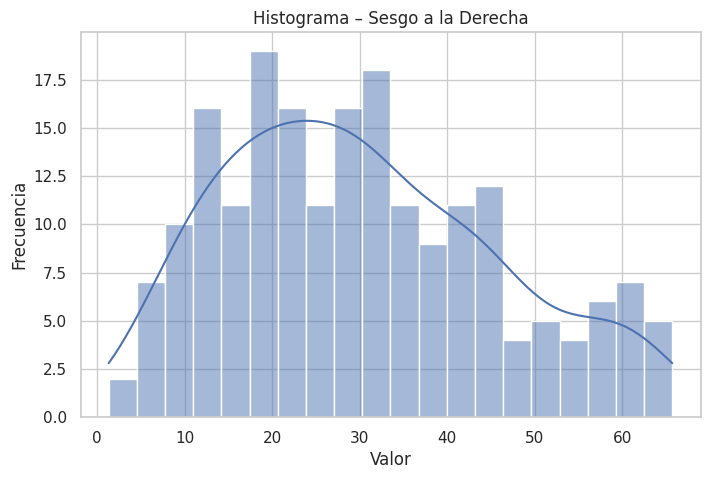

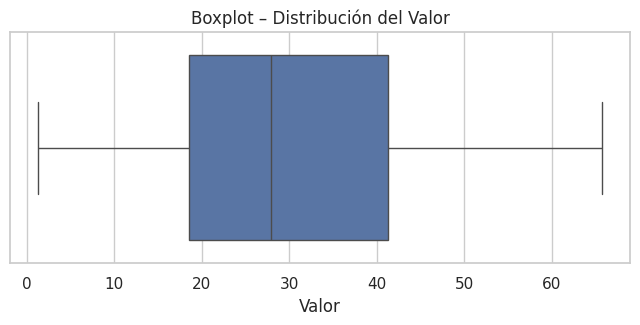

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['valor'], bins=20, kde=True)
plt.title("Histograma – Sesgo a la Derecha")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8,3))
sns.boxplot(x=df['valor'])
plt.title("Boxplot – Distribución del Valor")
plt.xlabel("Valor")
plt.show()


In [5]:
media = df['valor'].mean()
mediana = df['valor'].median()
moda = df['valor'].mode()[0]

print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda: {moda:.2f}")


Media: 30.17
Mediana: 27.96
Moda: 1.31


In [7]:
varianza = df['valor'].var()
desviacion = df['valor'].std()
rango = df['valor'].max() - df['valor'].min()

print(f"Varianza: {varianza:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Rango: {rango:.2f}")


Varianza: 240.31
Desviación estándar: 15.50
Rango: 64.42


In [6]:
scaler = MinMaxScaler()
df['valor_minmax'] = scaler.fit_transform(df[['valor']])

df['valor_zscore'] = (df['valor'] - df['valor'].mean()) / df['valor'].std()

df.head()


,valor,valor_minmax,valor_zscore
0,19.359580,0.280198,-0.697038
1,12.479993,0.173403,-1.140827
2,62.563092,0.950869,2.089936
3,63.853277,0.970897,2.173164
4,58.022004,0.880375,1.797000


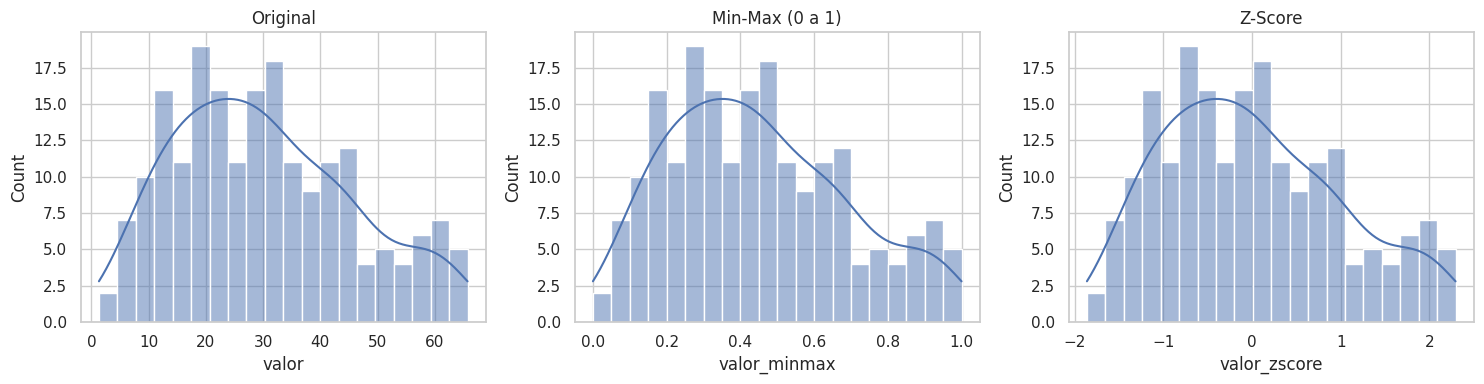

In [9]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(df['valor'], bins=20, kde=True)
plt.title("Original")

plt.subplot(1,3,2)
sns.histplot(df['valor_minmax'], bins=20, kde=True)
plt.title("Min-Max (0 a 1)")

plt.subplot(1,3,3)
sns.histplot(df['valor_zscore'], bins=20, kde=True)
plt.title("Z-Score")

plt.tight_layout()
plt.show()


In [10]:
conclusion = """
 CONCLUSIONES

• El dataset presenta un sesgo claro hacia la derecha.
• La media > mediana, lo que confirma el sesgo.
• Los gráficos (histograma y boxplot) muestran la cola hacia la derecha.
• La dispersión indica variabilidad moderada.
• La normalización es necesaria para Machine Learning porque iguala las escalas.
• Con los datos normalizados se pueden aplicar modelos como KNN, regresión o clustering.
"""

print(conclusion)



 CONCLUSIONES

• El dataset presenta un sesgo claro hacia la derecha.
• La media > mediana, lo que confirma el sesgo.
• Los gráficos (histograma y boxplot) muestran la cola hacia la derecha.
• La dispersión indica variabilidad moderada.
• La normalización es necesaria para Machine Learning porque iguala las escalas.
• Con los datos normalizados se pueden aplicar modelos como KNN, regresión o clustering.

